<a href="https://colab.research.google.com/github/normalitariyn/prosaindata/blob/main/Tugas_Membuat_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Normalita Eka Ariyanti 

NIM   : 20041110084

Kelas : PSD C

# **MEMBUAT PIPELINES**

1. Melakukan hosting pada postgresql, sql server, dan my sql untuk mendapatkan hostnamenya dengan menggunakan cloud cluster 
   Cara :
   - login ke cloud cluster, kemudian lakukan manage pada postgresql, sql server, dan my sql 
   - buat database dan users pada setiap tool di cloud cluster kemudian hubungkan ke postgresql, sql server, dan my sql 

2. Membuat database pada = 
  - postgresql local yang berisi data sepal length 
  - postgresql elephant yang berisi data sepal width 
  - mysql local yang berisi petal length 
  - sql server local yang berisi petal width dan class 

3. Membuat new pipeline pada orchest.io 
4. Membuat environment dengan menggunakan bahasa pemrograman python dengan memasukan perintah 

          ```
          pip install pandas scikit-learn matplotlib
          pip install psycopg2-binary
          pip install pymssql
          pip install mysql-connector-python
          ```
5. Membuat file python untuk melakukan :
   - ambil data sepal length dari postgresql local 
   - ambil data sepal width dari postgresql elephant 
   - ambil data petal length dari my sql local 
   - ambil data petal width dari sql server local 
   - gabung data sepal length, sepal width, petal length, petal width 
   - pemisahan data dari class
   - pemisahan menjadi class saja 

6. Membuat step berdasarkan file python yang sesuai. Pada pekerjaan saya, saya membuat 7 step (rincian step seperti poin di nomer 5) 
7. Hubungkan step sepal length, sepal width, petal length, petal width + class ke step "menggabungkan 4 tabel" (untuk menggabungkan data), kemudian step "menggabungkan 4 tabel" dihubungkan ke step "pemisahan data dari class" dan "pemisahan menjadi class saja" 
8. Masukan code python ke masing-masing file python yang sesuai dengan stepnya. 
9. Run All Pipeline yang telah dibuat. Apabila step berstatus "failed" setelah melakukan run all, maka periksa kembali code yang ada. Jika semua step berstatus "completed", maka pipeline menandakan telah berhasil dibuat 




## **HASIL PIPELINE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [5]:
image = cv2.imread('/content/drive/MyDrive/prosaindata/pipeline.png')

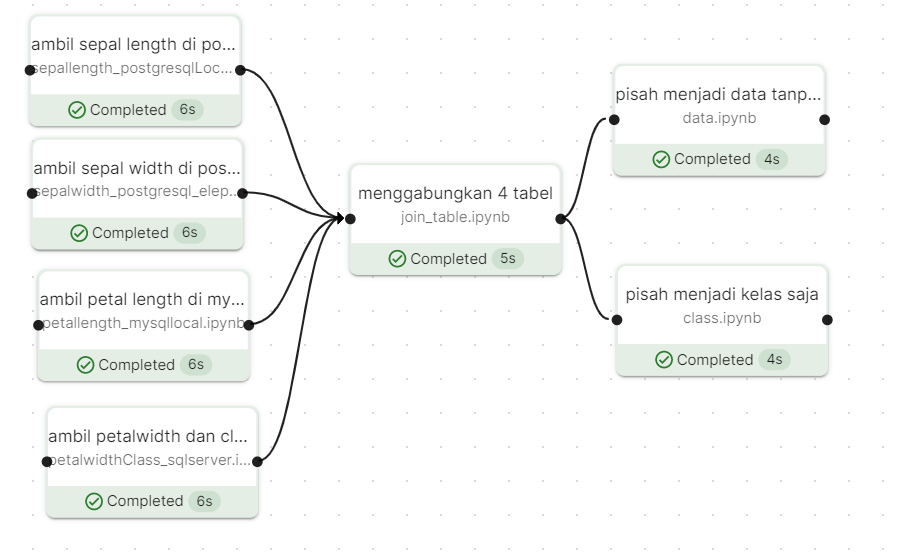

In [6]:
cv2_imshow(image)

## **CODE DARI SETIAP STEP**

**Ambil data Sepal Length dari postgresql local**

In [ ]:
import psycopg2
import pandas as pd
import orchest
# Connection parameters, yours will be different
param_dic = {
    "host"      : "postgresql-114559-0.cloudclusters.net",
    "database"  : "prosaindata0084",
    "port"  : "19986",
    "user"      : "Normalita",
    "password"  : "normalita123"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    print("Connection successful")
    return conn

def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Connect to the database
conn = connect(param_dic)

column_names = ["id","sepallength"]

df = postgresql_to_dataframe(conn, "select * from sepallength", column_names)
print(df)

In [ ]:
# Output the housing data so the next steps can retrieve it.
print("Outputting converted housing data...")
orchest.output(df, name="datasepallength")

print("Success!")

**Ambil data Sepal Width dari postgresql elephant**

In [ ]:
import psycopg2
import pandas as pd
import orchest
# Connection parameters, yours will be different
param_dic = {
    "host"      : "floppy.db.elephantsql.com",
    "database"  : "vcylnigs",
    "user"      : "vcylnigs",
    "password"  : "wknhb6JjNbsyDMz7qiG_TyXPyOJNiLmC"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Connect to the database
conn = connect(param_dic)

column_names = ["id","sepalwidth"]

df = postgresql_to_dataframe(conn, "select * from sepalwidth", column_names)
print (df)

In [ ]:
# Output the housing data so the next steps can retrieve it.
print("Outputting converted housing data...")
orchest.output(df, name="datasepalwidth")

print("Success!")

**Ambil data Petal Length dari mysql local**

In [ ]:
import mysql.connector
import pandas as pd
import orchest
db = mysql.connector.connect(
  host="mysql-114570-0.cloudclusters.net",
  port="10022",
  user="admin",
  passwd="M17ZS1QH",
  database  = "prosaindata0084"
)

def postgresql_to_dataframe(select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = db.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Connect to the database
column_names = ["id","petallength"]
df = postgresql_to_dataframe("select * from petallength", column_names)
print(df)

In [ ]:
# Output the housing data so the next steps can retrieve it.
print("Outputting converted housing data...")
orchest.output(df, name="datapetallength")

print("Success!")

**Ambil data Petal Width dari sql server**

In [ ]:
import pymssql
import pandas as pd
import orchest

connection = pymssql.connect(
    server='mssql-114575-0.cloudclusters.net',
    port = '19988',
    user='Normalita',
    password='Normalita123',
    database='prosaindata0084'
)

def postgresql_to_dataframe(select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = connection.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Connect to the database
column_names = ["Id","petalwidth","class"]
df = postgresql_to_dataframe("select * from petalwidthClass", column_names)
print(df)

In [ ]:
# Output the housing data so the next steps can retrieve it.
print("Outputting converted housing data...")
orchest.output(df, name="datapetalwidth-class")

print("Success!")

**Menggabungkan data sepal length, sepal width, petal length, petal width**

In [ ]:
# Retrieve the data from the previous step.
data = orchest.get_inputs()
datasepallength = data["datasepallength"]
datasepalwidth = data["datasepalwidth"]
datapetallength = data["datapetallength"]
datapetalwidth = data["datapetalwidth-class"]

alldata = pandas.concat((datasepallength, datasepalwidth,datapetallength,datapetalwidth), axis = 1)
alldata = alldata.drop(columns=['id','Id'])
alldata

# Output the housing data so the next steps can retrieve it.
print("Outputting converted housing data...")
orchest.output(alldata, name="alldata")
print("Success!")

**pemisahan data dari class**


In [ ]:
import pandas
import orchest
#create a dataframe with all training data except the target column
data = orchest.get_inputs()
semuadata = data["alldata"]
X = semuadata.drop(columns=["class"])
#check that the target variable has been removed
X.head()

**pemisahan menjadi class saja**

In [ ]:
import pandas as pd
import orchest
#create a dataframe with all training data except the target column
data = orchest.get_inputs()
semuadata = data["alldata"]
values = semuadata['class'].values
y = pd.DataFrame(values)
y